In [2]:
import pandas as pd
import numpy as np
import requests
import librosa
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import r2_score

## Definindo váriaveis para utilizar API do spotify (Foi usado apenas para geração de dataset)

In [ ]:
CLIENT_ID = '495e29329cf3403782ed38bf91da3243'
CLIENT_SECRET = '29ffcfba87744fd097a77d0c25bf4cd6'

In [ ]:
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [ ]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [ ]:
BASE_URL = 'https://api.spotify.com/v1/'

Função para pegar dados da música pelo seu id

In [ ]:
def getTrack(track_id):
  r = requests.get(BASE_URL + 'audio-features/' + track_id, headers=headers)
  return r.json()

def getTrackFeatures(track_id):
  r = requests.get(BASE_URL + 'tracks/' + track_id, headers=headers)
  return r.json()


Função para pegar dados das músicas de uma playlist pelo seu id

In [ ]:
def getPlaylist(playlist_id):
    data = []
    r = requests.get(BASE_URL + 'playlists/' + playlist_id + '/tracks', headers=headers)
    # if('items' in r.json()):
    try:
      for item in r.json()['items']:
        track = item['track']
        track_response = getTrack(track['id'])
        if (track_response != None):
          track_response.update({
                'track_name': track['name'],
            })

          track_response_popularity = getTrackFeatures(track['id'])
          if (track_response != None):
            track_response['popularity'] = track_response_popularity['popularity']


          data.append(track_response)

      return data
    except:
      print("ERROR")


In [ ]:
def getAlbum(album_id):
  r = requests.get(BASE_URL + 'albums/' + album_id + '/tracks', headers=headers)
  # print(r.json())
  data = []
  print(r)
  for item in r.json()['items']:

    # print(item)
    track = item
    track_response = getTrack(track['id'])
    if (track_response != None):
      track_response.update({
            'track_name': track['name'],
        })

      track_response_popularity = getTrackFeatures(track['id'])
      if (track_response != None):
        track_response['popularity'] = track_response_popularity['popularity']


      data.append(track_response)

  return data

getAlbum('6UUG6SxdjbHC8ALwmKS1HO')

<Response [200]>


[{'danceability': 0.566,
  'energy': 0.893,
  'key': 10,
  'loudness': -5.644,
  'mode': 1,
  'speechiness': 0.0366,
  'acousticness': 0.00112,
  'instrumentalness': 0,
  'liveness': 0.6,
  'valence': 0.292,
  'tempo': 112.015,
  'type': 'audio_features',
  'id': '3aQEwFycSNOK5Dus4bog5T',
  'uri': 'spotify:track:3aQEwFycSNOK5Dus4bog5T',
  'track_href': 'https://api.spotify.com/v1/tracks/3aQEwFycSNOK5Dus4bog5T',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3aQEwFycSNOK5Dus4bog5T',
  'duration_ms': 264920,
  'time_signature': 4,
  'track_name': 'Never Gonna Stop Singing - Live',
  'popularity': 42},
 {'danceability': 0.493,
  'energy': 0.814,
  'key': 11,
  'loudness': -6.366,
  'mode': 0,
  'speechiness': 0.0439,
  'acousticness': 0.00167,
  'instrumentalness': 1.09e-05,
  'liveness': 0.398,
  'valence': 0.362,
  'tempo': 158.12,
  'type': 'audio_features',
  'id': '4VS6PK5bVEBtEt4lLvLYoi',
  'uri': 'spotify:track:4VS6PK5bVEBtEt4lLvLYoi',
  'track_href': 'https://api.spo

Id's das plailists utilizadas

In [ ]:
playlists = [
    '4VtpXYtfaMGO8cbnMo4OaE', # Mais tocadas 2022 - B9
    '37i9dQZF1DWTqOsMG7SsUt', # Top hists 2021 - Spotify
    '37i9dQZF1DX6serxMtAeO7', # Top hists 2020 - Spotify
    '5v70k64enJzKM4gAfD1Nei', # Top hists 2019 - Spotify
    # '37i9dQZF1DXe2bobNYDtW8', # Top hists 2018 - Spotify
    # '37i9dQZF1DWTE7dVUebpUW', # Top hists 2017 - Spotify
    # '37i9dQZF1DX8XZ6AUo9R4R', # Top hists 2016 - Spotify
    #'37i9dQZF1DX9ukdrXQLJGZ', # Top hists 2015 - Spotify
    #'37i9dQZF1DX0h0QnLkMBl4', # Top hists 2014 - Spotify
    #'37i9dQZF1DX3Sp0P28SIer', # Top hists 2013 - Spotify
    #'37i9dQZF1DX0yEZaMOXna3', # Top hists 2012 - Spotify
    #'37i9dQZF1DXcagnSNtrGuJ', # Top hists 2011 - Spotify
    #'37i9dQZF1DXc6IFF23C9jj', # Top hists 2010 - Spotify
    #'37i9dQZF1DX4UkKv8ED8jp', # Top hists 2009 - Spotify
    #'37i9dQZF1DWYuGZUE4XQXm', # Top hists 2008 - Spotify
    #'37i9dQZF1DX3j9EYdzv2N9', # Top hists 2007 - Spotify
    #'37i9dQZF1DX1vSJnMeoy3V', # Top hists 2006 - Spotify
    #'37i9dQZF1DWWzQTBs5BHX9', # Top hists 2005 - Spotify
    #'37i9dQZF1DWTWdbR13PQYH', # Top hists 2004 - Spotify
    #'37i9dQZF1DXaW8fzPh9b08', # Top hists 2003 - Spotify
    #'37i9dQZF1DX0P7PzzKwEKl', # Top hists 2002- Spotify
    #'37i9dQZF1DX9Ol4tZWPH6V', # Top hists 2001 - Spotify
    #'37i9dQZF1DWUZv12GM5cFk', # Top hists 2000 - Spotify
    # '37i9dQZF1DX4PrR66miO50', # Top hists 1999 - Spotify
    # '37i9dQZF1DWWmGB2u14f8m', # Top hists 1998 - Spotify
    # '37i9dQZF1DWWKd15PHZNnl', # Top hists 1997 - Spotify
    # '37i9dQZF1DWZkDl55BkJmo', # Top hists 1996 - Spotify
    # '37i9dQZF1DXayIOFUOVODK', # Top hists 1995 - Spotify
    # '37i9dQZF1DXbKFudfYGcmj', # Top hists 1994 - Spotify
    # '37i9dQZF1DXbUFx5bcjwWK', # Top hists 1993 - Spotify
    # '37i9dQZF1DX9ZZCtVNwklG', # Top hists 1992 - Spotify
    # '37i9dQZF1DX6TtJfRD994c', # Top hists 1991 - Spotify
    # '37i9dQZF1DX4joPVMjBCAo', # Top hists 1990 - Spotify
    # '37i9dQZF1DX4qJrOCfJytN' # Top hists 1989 - Spotify
]

In [ ]:
df_tracks = pd.DataFrame()
cont = 0
for playlist in playlists:
    data = getPlaylist(playlist)
    df = pd.DataFrame(data)

    if (cont == 0):
      df_tracks = df
      cont += 1
      continue
    else:
      data = getPlaylist(playlist)
      df = pd.DataFrame(data)
      if (df.empty):
        continue
      df_tracks = pd.concat([df_tracks, df])

## Manipulando e normalizando os dados

In [44]:
df_tracks = pd.read_csv('https://raw.githubusercontent.com/lucasdantas2014/projeto-mineracao-de-dados/main/song_data.csv')

In [45]:
df_tracks = df_tracks.rename(columns={"song_popularity": "popularity", "audio_valence": "valence", "audio_mode": "mode"})
df_tracks

,song_name,popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


<ipython-input-46-c8666146c287>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_tracks.corr(),annot = True)


<Axes: >

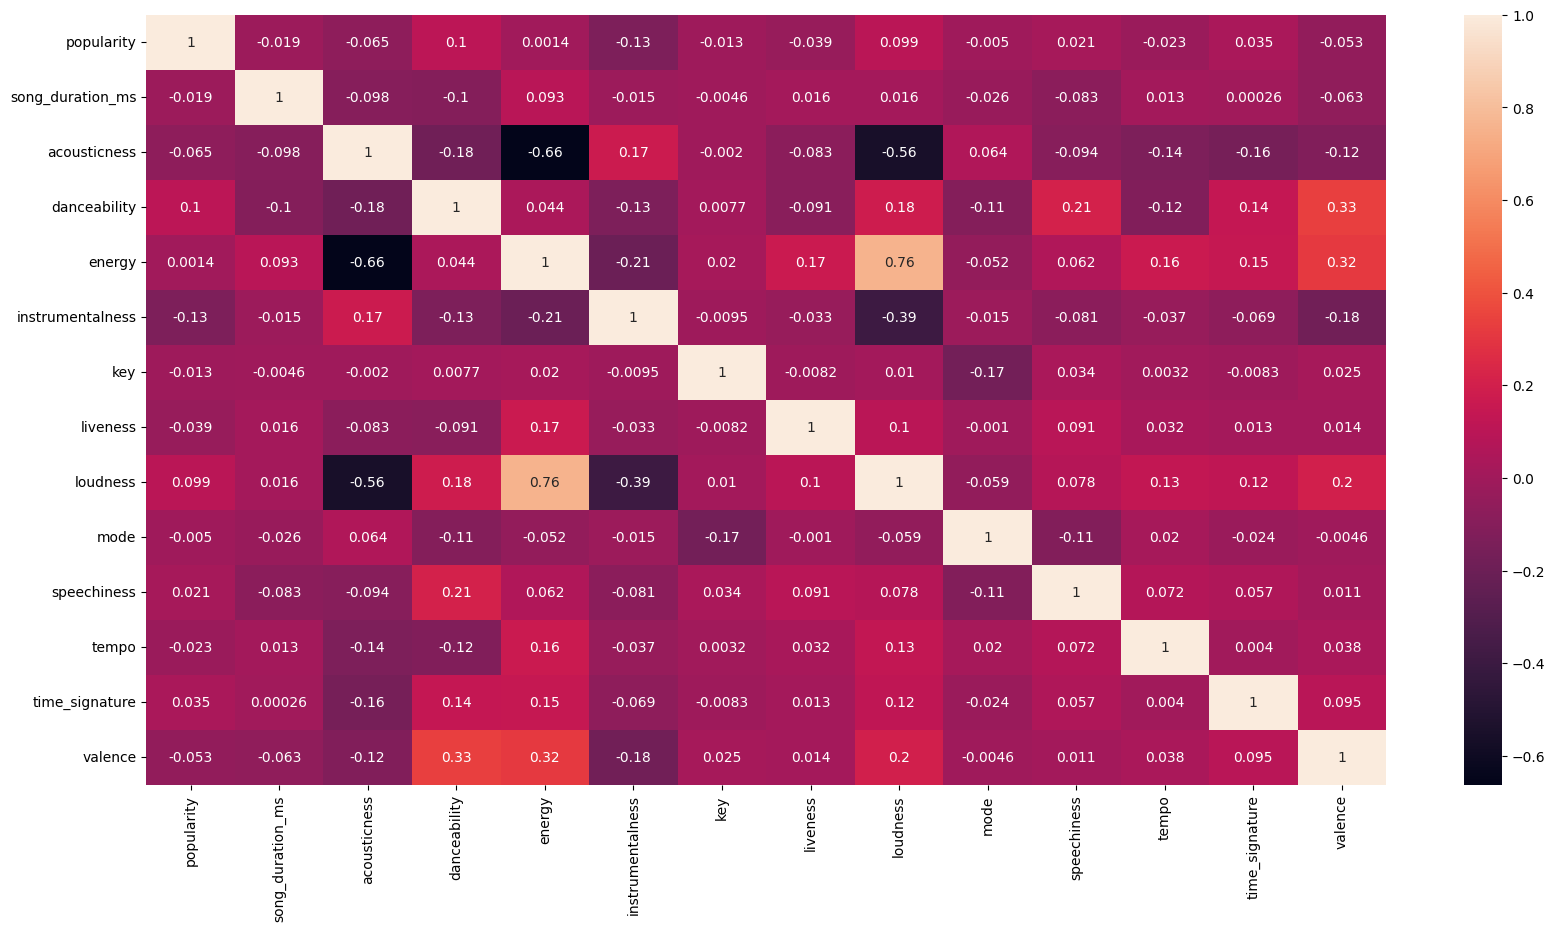

In [46]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_tracks.corr(),annot = True)

### Pegando apenas os dados que são quantitavos para testar modelos de regressão




In [47]:
df_tracks_quantitativos = df_tracks

cols_to_drop = []
for column in df_tracks:
    if df_tracks[column].dtype == 'object':
        cols_to_drop.append(column)
df_tracks_quantitativos = df_tracks.drop(columns=cols_to_drop)

df_tracks_quantitativos

,popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


### Normalizando os dados colocando todos para ficar na faixa entre 0 e 1

In [48]:
df_tracks_normalized = (df_tracks_quantitativos-df_tracks_quantitativos.min())/(df_tracks_quantitativos.max()-df_tracks_quantitativos.min())
df_tracks_normalized

,popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.73,0.140059,0.005541,0.502533,0.682342,0.000029,0.727273,0.049226,0.859242,1.0,0.031243,0.689425,0.8,0.481707
1,0.66,0.114658,0.010340,0.549139,0.853697,0.000000,0.272727,0.099580,0.801948,0.0,0.052922,0.434371,0.8,0.376016
2,0.76,0.122938,0.008202,0.746707,0.462888,0.448345,0.000000,0.250333,0.766734,1.0,0.084166,0.511233,0.8,0.329268
3,0.74,0.114658,0.026505,0.456940,0.970940,0.003561,0.000000,0.093426,0.838352,1.0,0.113709,0.505303,0.8,0.201220
4,0.56,0.118514,0.000957,0.452888,0.766517,0.000000,0.909091,0.104707,0.835204,1.0,0.033262,0.709856,0.8,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,0.60,0.082606,0.896586,0.506586,0.150241,0.000066,1.000000,0.102656,0.561569,1.0,0.036982,0.470328,0.8,0.304878
18831,0.60,0.108354,0.768072,0.501520,0.160262,0.000001,1.000000,0.096503,0.611850,0.0,0.031987,0.389100,0.8,0.269309
18832,0.23,0.095231,0.850401,0.728470,0.324602,0.000000,0.000000,0.117014,0.657845,1.0,0.037726,0.538689,0.8,0.290650
18833,0.55,0.190383,0.948795,0.494428,0.325604,0.015747,0.272727,0.110860,0.662850,1.0,0.034857,0.437702,0.8,0.328252


## Testando modelos

### Árvore de decisão

In [51]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carregar os dados
data = df_tracks_normalized

# Separar as features (características) e o alvo (popularity)
X = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = data['popularity']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de árvore de decisão
model = DecisionTreeRegressor()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer predições
predictions = model.predict(X_test)

# Avaliar o modelo usando a métrica de erro médio quadrático (RMSE)
mse = mean_squared_error(y_test, predictions)
rmse_arvore_decisao = np.sqrt(mse)
print("RMSE:", rmse_arvore_decisao)

# Calcular o coeficiente de determinação (R²)
r2_arvore_decisao = r2_score(y_test, predictions)
print("Coeficiente de Determinação (R²):", r2_arvore_decisao)

RMSE: 0.23257202181796763
Coeficiente de Determinação (R²): -0.12201533871229597


### Regressão Linear


In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carregar os dados
data = df_tracks_normalized

# Separar as features (características) e o alvo (popularity)
X = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = data['popularity']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer predições
predictions = model.predict(X_test)

# Avaliar o modelo usando a métrica de erro médio quadrático (RMSE)
mse = mean_squared_error(y_test, predictions)
rmse_linear = np.sqrt(mse)
print("RMSE:", rmse_linear)


# Calcular o coeficiente de determinação (R²)
r2_linear = r2_score(y_test, predictions)
print("Coeficiente de Determinação (R²):", r2_linear)


RMSE: 0.21495592929697502
Coeficiente de Determinação (R²): 0.041520749442684024


### Regressão Kneighbors

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

def calculate_error(Y_pred, Y_actual):
    error = 0
    for i in range(len(Y_pred)):
        error += abs(Y_pred[i] - Y_actual[i])**2

    return error

# Carregar os dados
data = df_tracks_normalized
predict = "popularity"

# Separar as features (características) e o alvo (popularity)
X = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = data['popularity']
Y_validation = df_tracks_normalized[[predict]].values.ravel()

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_errors = [np.inf]
for k in range(1,50):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    Y_val_pred = model.predict(X_test)
    k_errors.append(calculate_error(Y_val_pred, Y_validation))

if not os.path.exists('figs'):
    os.makedirs('figs')

plt.scatter(x=range(len(k_errors)),
            y=k_errors)
plt.xlabel('value of k')
plt.ylabel('error')
plt.title('Error values for different k values on a KNN classifier')
plt.grid(axis='both',alpha=0.5)

fname = os.path.join(".", "figs", "k_values.png")
plt.savefig(fname)
print(f"\nFigure saved as {fname}\n")
plt.close()


Figure saved as ./figs/k_values.png



In [60]:
# Carregar os dados
data = df_tracks_normalized

# Separar as features (características) e o alvo (popularity)
X = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = data['popularity']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão kneighbors
k=14
model = KNeighborsRegressor(n_neighbors=k)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer predições
predictions = model.predict(X_test)

# Avaliar o modelo usando a métrica de erro médio quadrático (RMSE)
mse = mean_squared_error(y_test, predictions)
rmse_kneighbors = np.sqrt(mse)
print("RMSE:", rmse_kneighbors)

# Calcular o coeficiente de determinação (R²)
r2_kneighbors = r2_score(y_test, predictions)
print("Coeficiente de Determinação (R²):", r2_kneighbors)


RMSE: 0.207779372146087
Coeficiente de Determinação (R²): 0.10445231286716783


### SVR

In [55]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carregar os dados
data = df_tracks_normalized

# Separar as features (características) e o alvo (popularity)
X = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = data['popularity']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo SVM para regressão
model = SVR()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer predições
predictions = model.predict(X_test)

# Avaliar o modelo usando a métrica de erro médio quadrático (RMSE)
mse = mean_squared_error(y_test, predictions)
rmse_svr = np.sqrt(mse)
print("RMSE:", rmse_svr)


# Calcular o coeficiente de determinação (R²)
r2_svr = r2_score(y_test, predictions)
print("Coeficiente de Determinação (R²):", r2_svr)


RMSE: 0.21098504358134731
Coeficiente de Determinação (R²): 0.07660568344274121


### Random Forest


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Carregar os dados
data = df_tracks_normalized

# Separar os dados em variáveis de entrada (X) e variável de saída (y)
X = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = data['popularity']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliar o modelo usando a métrica MAE
mse = mean_squared_error(y_test, predictions)
rmse_rf = np.sqrt(mse)
print("RMSE:", rmse_rf)


# Calcular o coeficiente de determinação (R²)
r2_rf = r2_score(y_test, predictions)
print("Coeficiente de Determinação (R²):", r2_rf)

RMSE: 0.17224506277464577
Coeficiente de Determinação (R²): 0.38457175863175885


### Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Carregar os dados
data = df_tracks_normalized

# Separar os dados em variáveis de entrada (X) e variável de saída (y)
X = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = data['popularity']

# Criar e treinar o modelo Gradient Boosting
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliar o modelo usando a métrica MAE
mse = mean_absolute_error(y_test, predictions)
rmse_gb = np.sqrt(mse)
print("RMSE:", rmse_gb)


# Calcular o coeficiente de determinação (R²)
r2_gb = r2_score(y_test, predictions)
print("Coeficiente de Determinação (R²):", r2_gb)

RMSE: 0.40498159621257424
Coeficiente de Determinação (R²): 0.11509028935287524


## Análise dos resultados

In [61]:
print("RMSE: ")
print("Regressão Linear: ", rmse_linear)
print("Regressão Kneighbors: ", rmse_kneighbors)
print("Árvore de decisão: ", rmse_arvore_decisao)
print("SVR: ", rmse_svr)
print("Random Forest: ", rmse_rf)
print("GradientBoosting: ", rmse_gb)

print("\nR²")
print("Regressão Linear: ", r2_linear)
print("Regressão Kneighbors: ", r2_kneighbors)
print("Árvore de decisão: ", r2_arvore_decisao)
print("SVR: ", r2_svr)
print("Random Forest: ", r2_rf)
print("GradientBoosting: ", r2_gb)

df_results = pd.DataFrame(
     [["Regressão Linear", rmse_linear, r2_linear],
     ["Regressão Kneighbors", rmse_kneighbors, r2_kneighbors],
     ["Árvore de decisão", rmse_arvore_decisao, r2_arvore_decisao],
     ["SVR", rmse_svr, r2_svr],
     ["Random Forest", rmse_rf, r2_rf],
     ["GradientBoosting", rmse_gb, r2_gb]],
    columns=["Modelo", "RMSE", "R2"])
df_results

RMSE: 
Regressão Linear:  0.21495592929697502
Regressão Kneighbors:  0.207779372146087
Árvore de decisão:  0.23257202181796763
SVR:  0.21098504358134731
Random Forest:  0.17224506277464577
GradientBoosting:  0.40498159621257424

R²
Regressão Linear:  0.041520749442684024
Regressão Kneighbors:  0.10445231286716783
Árvore de decisão:  -0.12201533871229597
SVR:  0.07660568344274121
Random Forest:  0.38457175863175885
GradientBoosting:  0.11509028935287524


,Modelo,RMSE,R2
0,Regressão Linear,0.214956,0.041521
1,Regressão Kneighbors,0.207779,0.104452
2,Árvore de decisão,0.232572,-0.122015
3,SVR,0.210985,0.076606
4,Random Forest,0.172245,0.384572
5,GradientBoosting,0.404982,0.115090


# Conclusão

A popularidade de uma música está relacionada vários fatores para além de suas caracteristicas, assim depois de fazer uma análise com vários modelos de predição, percebemos que as características das músicas não influenciam diretamente na popularidade das mesmas.

Entretanto, apesar de não obtermos exito em determinar a taxa de popularidade de uma música, é possível que mudanças no escopo do problema, como mudar para um problema de classificação ou mais trativas nos dados, possam nos conferir um modelo mais preciso.
